In [1]:
from lambeq import BobcatParser, spiders_reader, stairs_reader, cups_reader, TreeReader, AtomicType, IQPAnsatz
from discopy import grammar, Ty, Word
from pytket.circuit.display import render_circuit_jupyter

/usr/local/lib/python3.8/dist-packages/lambeq/ccg2discocat/ccg_parser.py:23: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Test sentence:

In [2]:
sentence = "I run"

Generate plot

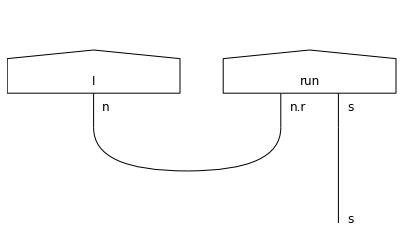

In [3]:
parser = BobcatParser()

diagram = parser.sentence2diagram(sentence)

grammar.draw(diagram, figsize=(14, 3), fontsize=12)

Simplify (rewriting)

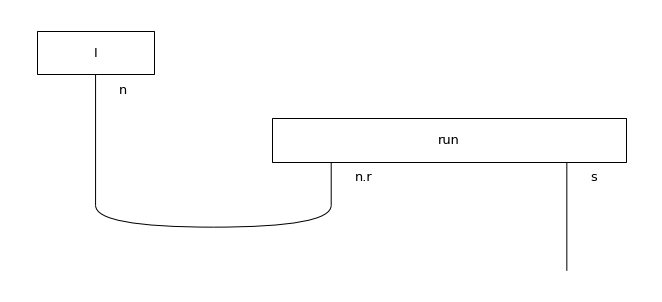

In [4]:
from lambeq import Rewriter

# Apply rewrite rule for prepositional phrases

rewriter = Rewriter(['prepositional_phrase', 'determiner'])
rewritten_diagram = rewriter(diagram)

# rewritten_diagram.draw(figsize=(11,5), fontsize=13)
normalised_diagram = rewritten_diagram.normal_form()
normalised_diagram.draw(figsize=(9,4), fontsize=13)

Function that plots the circuit with specified numbers of qubits and layers

In [5]:
def plotCircuit(n_noun, n_sentence, n_layer, plottket=True):
    # Define atomic types
    N = AtomicType.NOUN
    S = AtomicType.SENTENCE

    # Convert string diagram to quantum circuit
    ansatz = IQPAnsatz({N: n_noun, S: n_sentence}, n_layers=n_layer)
    discopy_circuit = ansatz(diagram)
    
    # plot discopy circuit
    if(plottket == False):
        discopy_circuit.draw(figsize=(15,10))

    # plot tket circuit
    if(plottket):
        tket_circuit = discopy_circuit.to_tk()
        render_circuit_jupyter(tket_circuit)

In [6]:
plotCircuit(1, 1, 1, True)

In [7]:
plotCircuit(2, 1, 3, True)